<a href="https://colab.research.google.com/github/SubaruFallout/BasicOfDigitalImageProcessing/blob/master/constructionOfMorphologicalSkeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Построение морфологического скелета** <br>
Разработать программу построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных структурирующих элементов.

Содержание отчета: <br>
&emsp;Исходные изображения <br>
&emsp;Код программы (для Jupiter Notebook) <br>
&emsp;Результат работы программы <br>
&emsp;Срок 01.11.2022 <br>

In [9]:
# import the necessary libraries
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

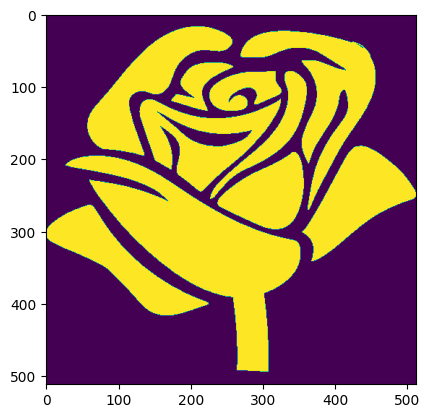

In [15]:
# read image
img = cv2.imread("resouces/rose_binary.png", cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_not(img)

plt.imshow(img)
plt.show()
orig_img = img.copy()

In [16]:
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = False

In [17]:
while (not done):
    eroded = cv2.erode(img, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(img, temp)
    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if (zeros == size):
        done = True

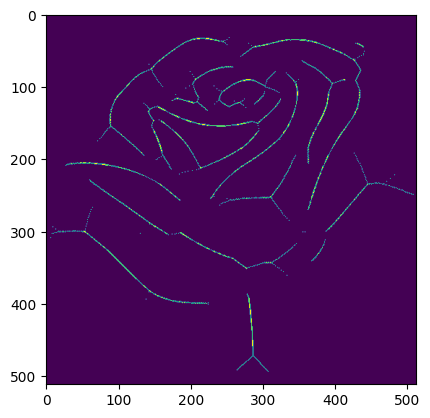

In [18]:
plt.imshow(skel)
plt.show()